In [6]:
import pandas as pd
import matplotlib.pyplot as plt


data = {}

def importData(filename):

    f = open(filename, "r")
    temperature = float(f.readline().strip("Temperature "))
    df = pd.read_csv(filename, skiprows=1)
    return temperature, df

for i in range(15):
    temperature, df = importData("output/temp_%s" % i)
    data[temperature] = df


127368075.3
127485892.0
127436881.6
127512318.0
127467245.0
129671266.0
140811454.0
140789588.0
139353251.0
131202204.0
118625363.0
104553044.9
13139918.11
1359897.684
190754.856


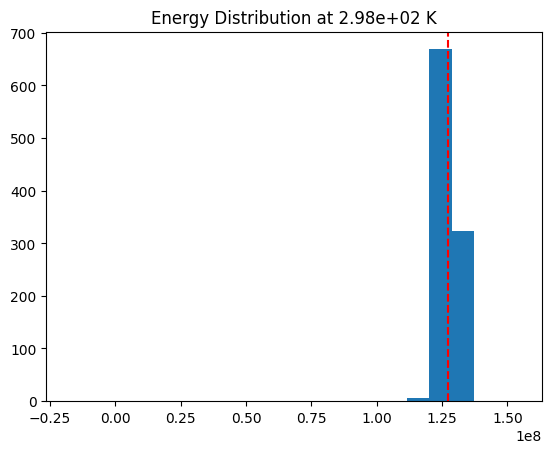

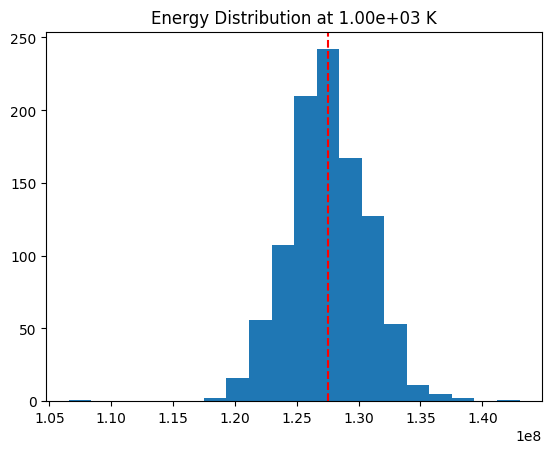

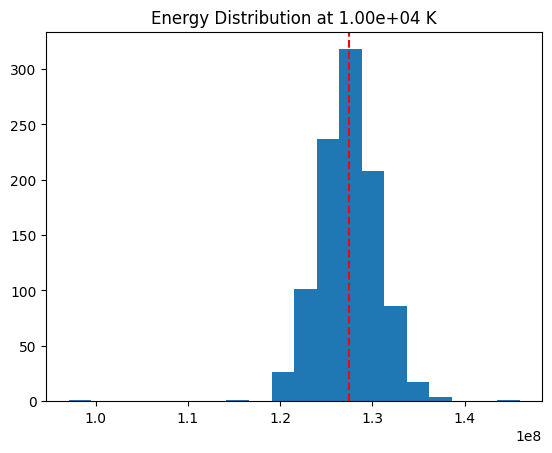

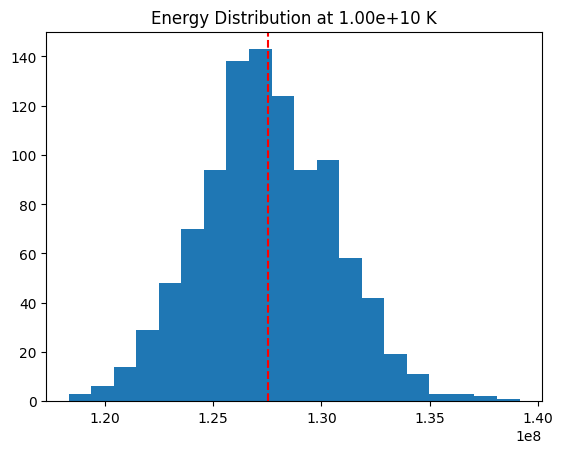

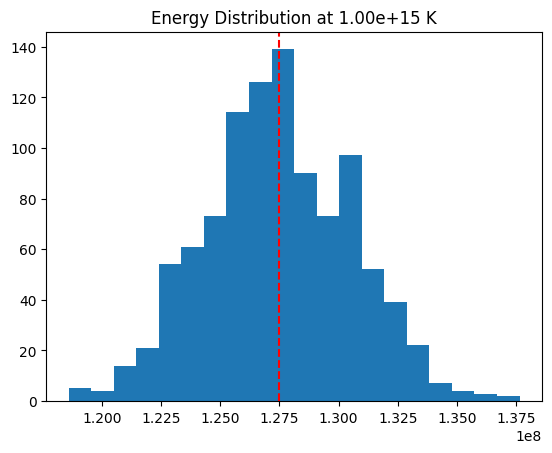

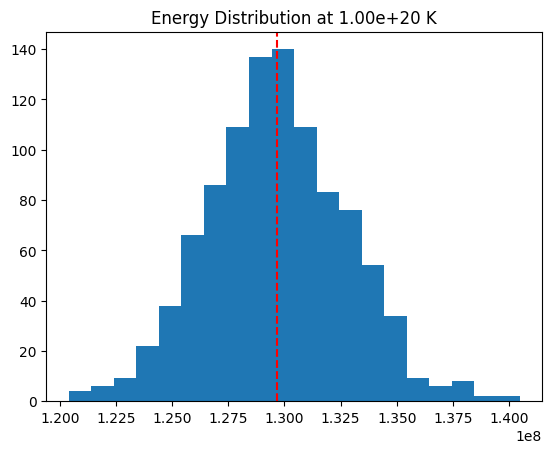

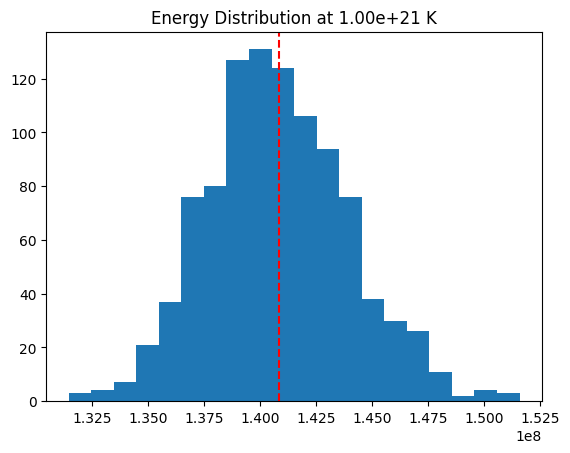

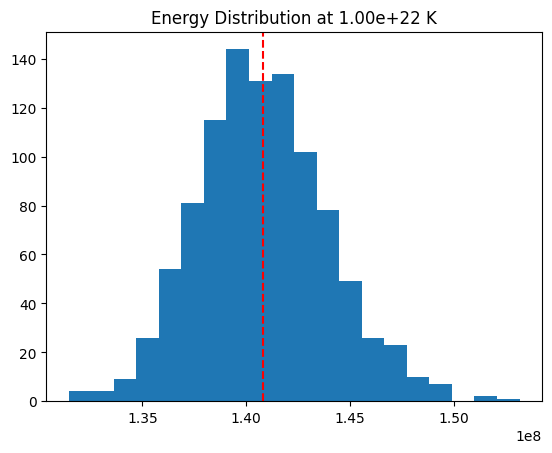

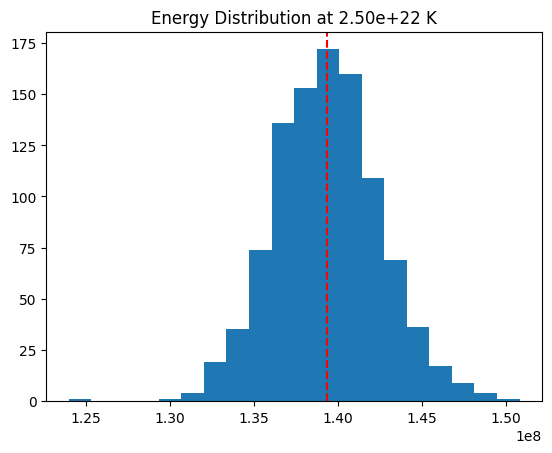

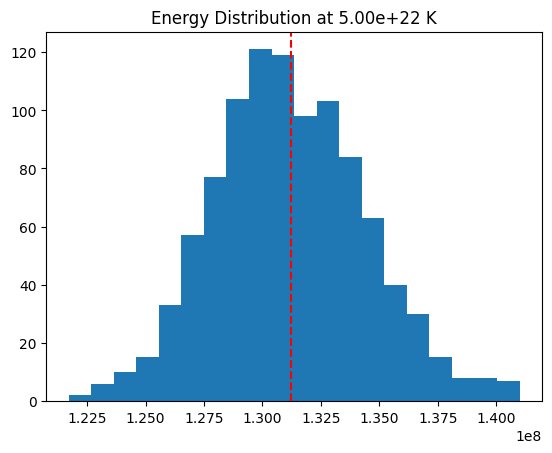

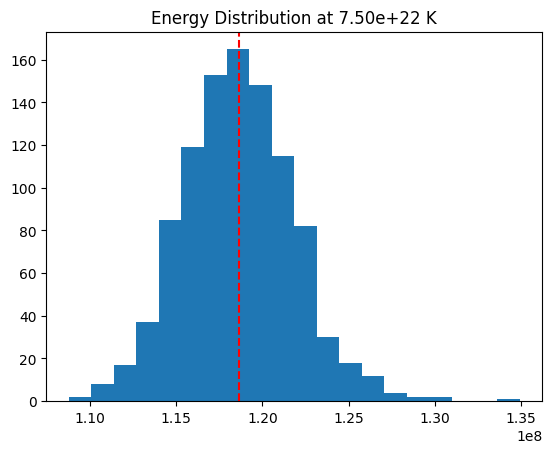

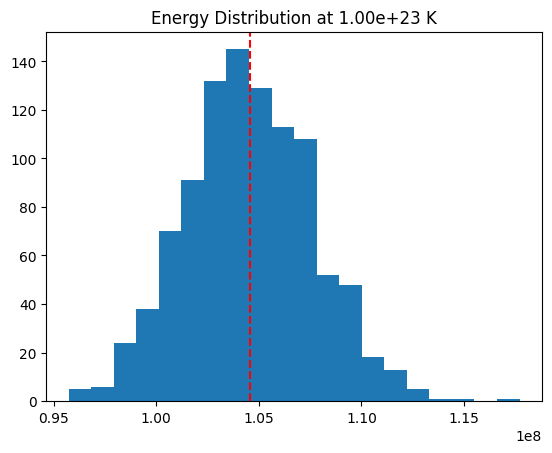

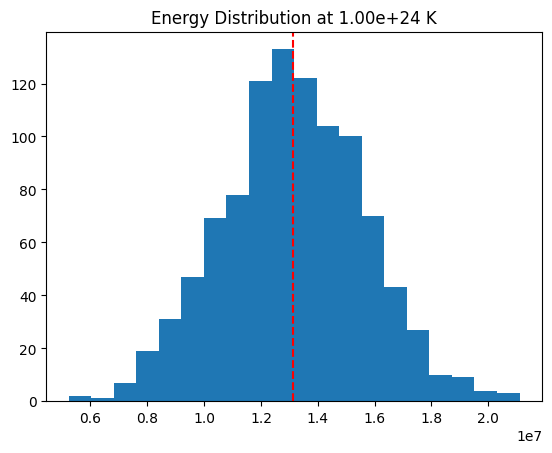

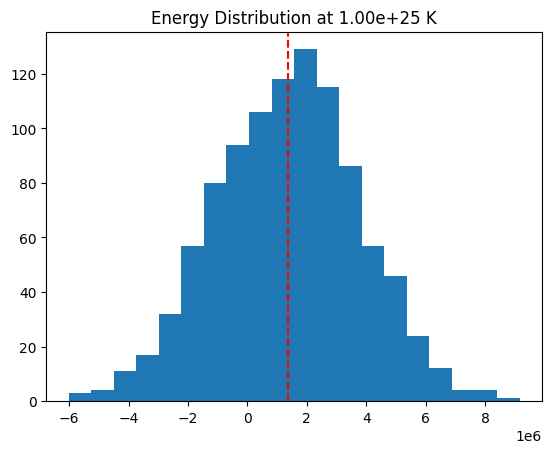

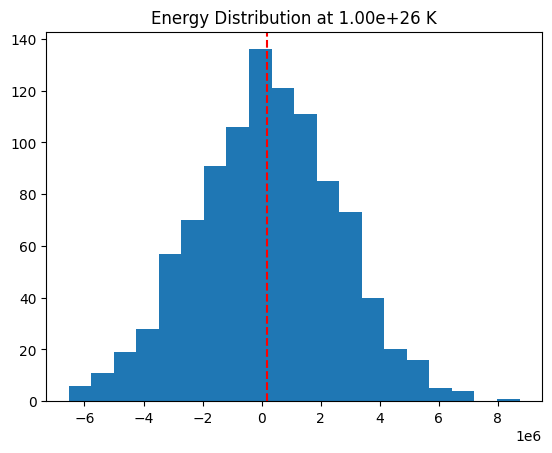

In [7]:
for temperature in data.keys():

    fig, ax = plt.subplots()
    df = data[temperature]
    ax.hist(df["energy"], bins=20)
    ax.set_title(f"Energy Distribution at %s K" % "{:.2e}".format(temperature))
    # ax.set_xlim(-10e6, 10e6)
    ax.axvline(df["energy"].mean(), color="red", linestyle="dashed")
    print(df["energy"].mean())


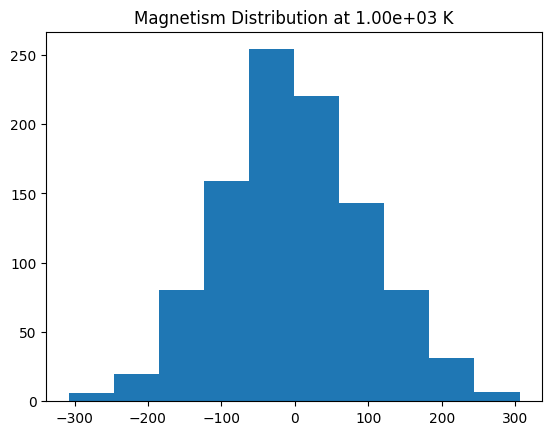

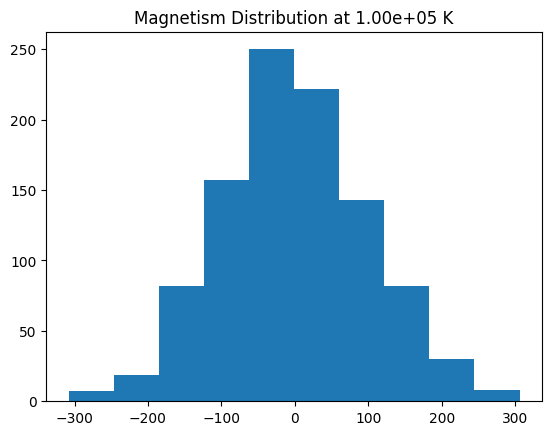

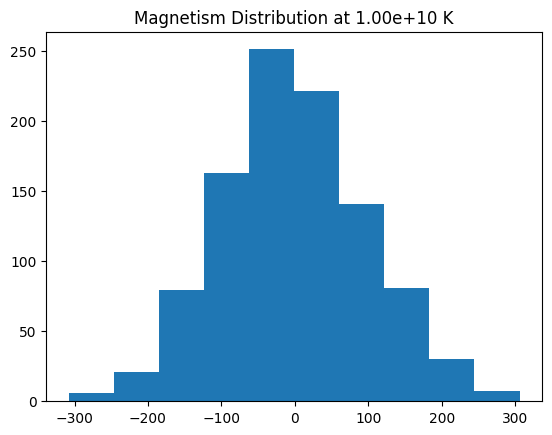

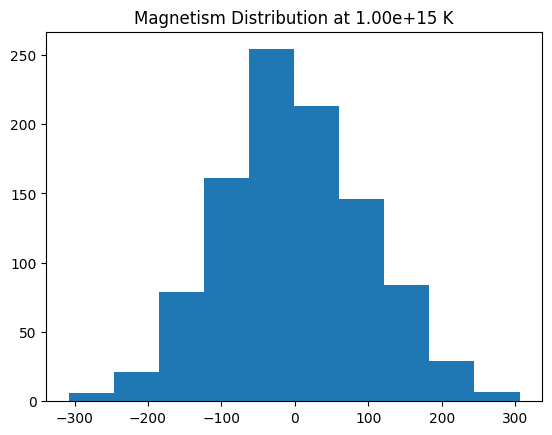

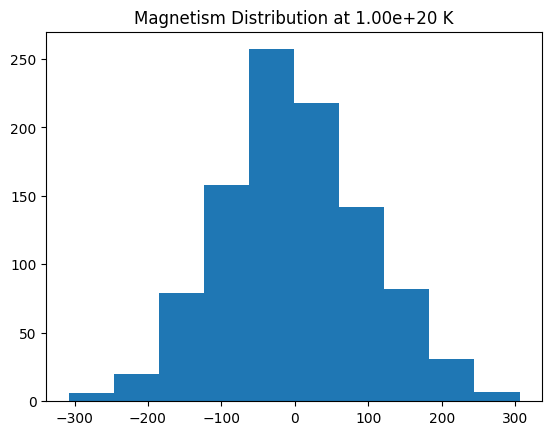

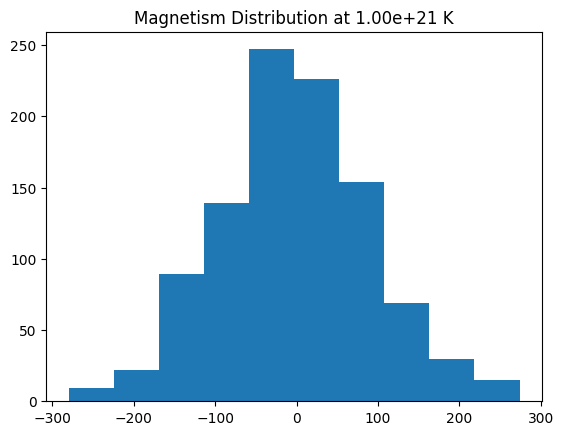

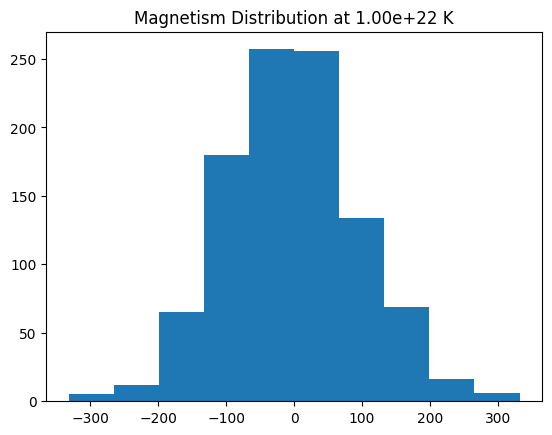

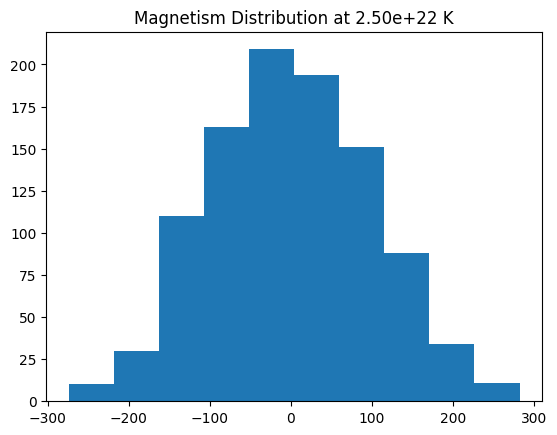

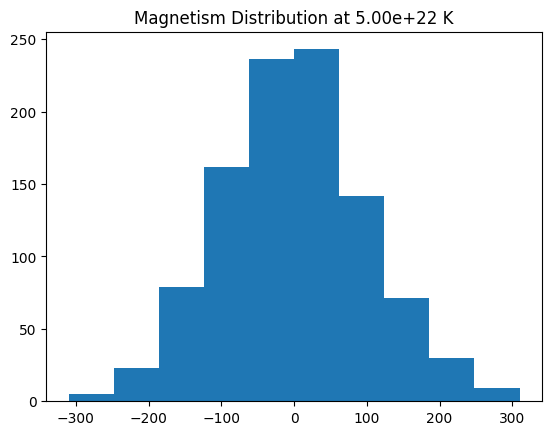

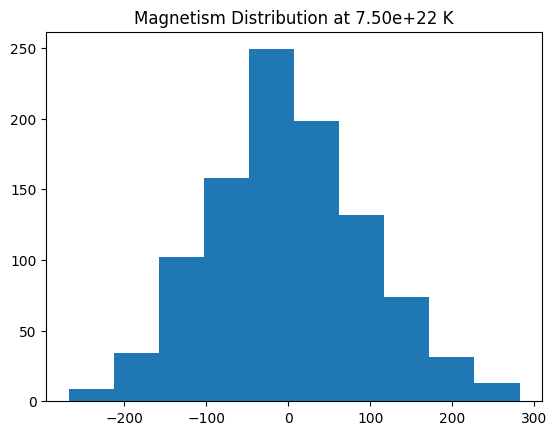

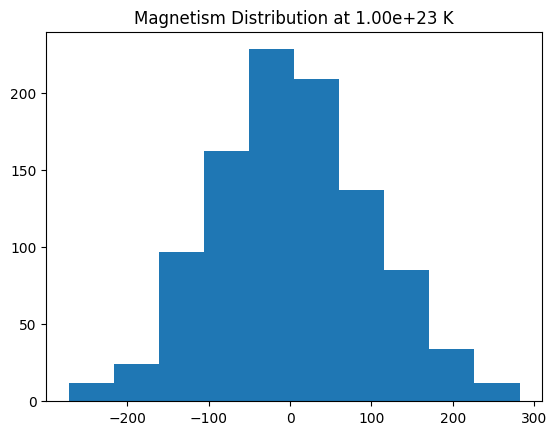

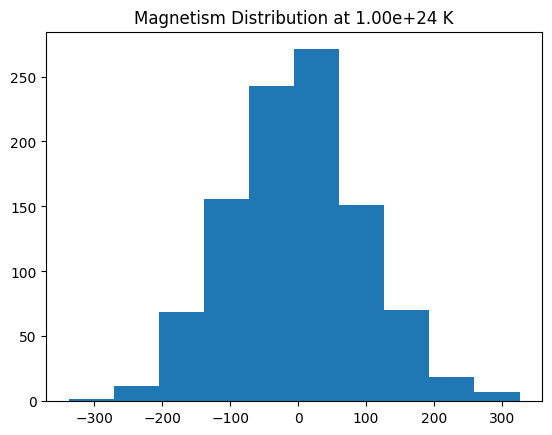

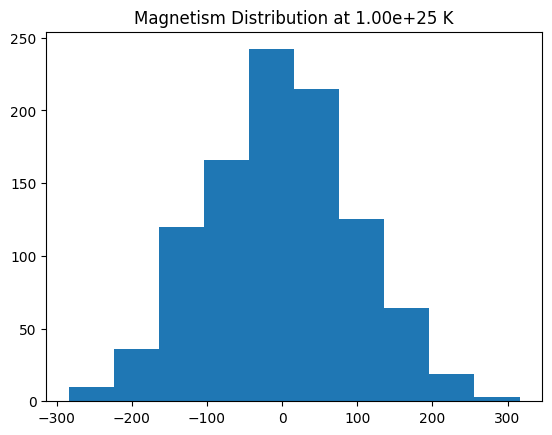

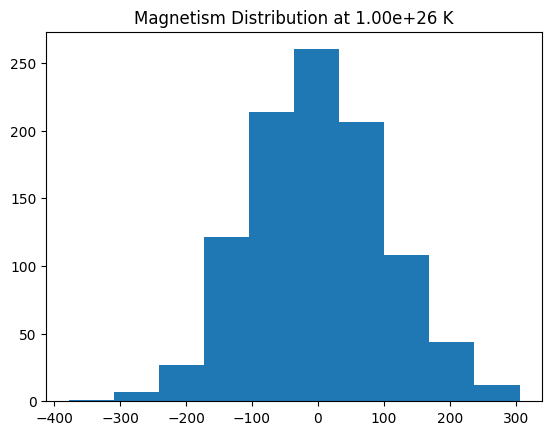

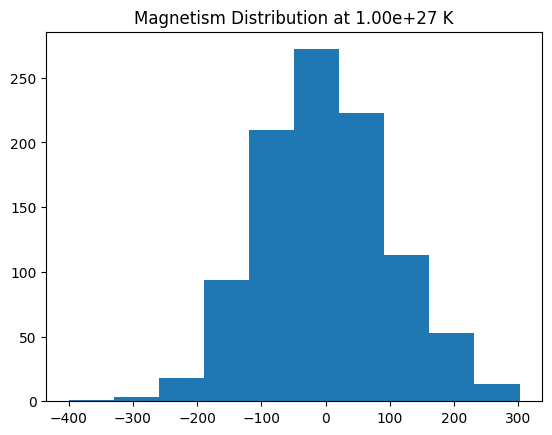

In [35]:
for temperature in data.keys():

    fig, ax = plt.subplots()
    df = data[temperature]
    ax.hist(df["magnetism"])
    ax.set_title(f"Magnetism Distribution at %s K" % "{:.2e}".format(temperature))

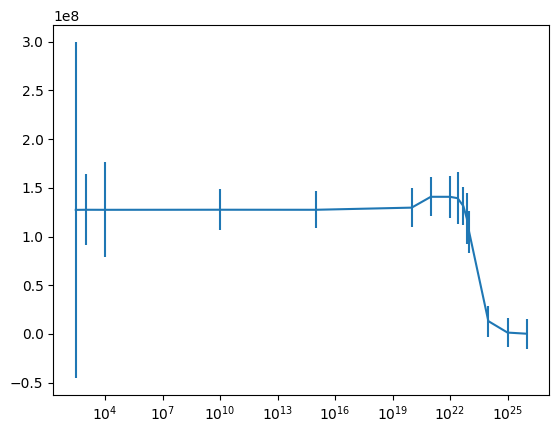

In [8]:
fig, ax = plt.subplots()

mean_energies = []
ranges = []

for temp in data.keys():
    mean_energies.append(data[temp]["energy"].mean())
    ranges.append(data[temp]["energy"].max()-data[temp]["energy"].min())

ax.errorbar(data.keys(), mean_energies, ranges)
ax.set_xscale("log")

# for xy in zip(data.keys(), mean_energies):
#     ax.annotate("%s %s" % xy, xy=xy)